In [1]:
import re

import numpy as np
import pandas as pd
import seaborn as sns
import csv

In [2]:
import os

#path = os.path('C:/Users/nishi/Documents/data science/SDP')
#data = pd.read_csv(path)

df = pd.read_csv('C:/Users/nishi/Documents/data science/SDP/clean_dataset.csv')
df

C:\Users\nishi\AppData\Local\Temp\ipykernel_14916\1319228764.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/nishi/Documents/data science/SDP/clean_dataset.csv')


,rotten_tomatoes_link,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,False,Sunday Mail (Australia),Fresh,3.5,2/9/2010,Whether audiences will get behind The Lightnin...
1,m/0814255,True,Arizona Republic,Fresh,3.5,2/10/2010,"Percy Jackson isn't a great movie, but it's a ..."
2,m/0814255,True,The Age (Australia),Fresh,3,2/10/2010,"Crammed with dragons, set-destroying fights an..."
3,m/0814255,False,Daily Mirror (UK),Fresh,4,2/10/2010,"This action-packed fantasy adventure, based on..."
4,m/0814255,True,Time Out,Rotten,2,2/10/2010,Chris Columbus returns to his comfort zone for...
...,...,...,...,...,...,...,...
358249,m/zulu_dawn,False,PopcornQ,Fresh,3.0,8/14/2005,NaN
358250,m/zulu_dawn,False,ColeSmithey.com,Fresh,4.0,11/1/2005,NaN
358251,m/zulu_dawn,False,Fantastica Daily,Rotten,2.0,11/2/2005,NaN
358252,m/zulu_dawn,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5,3/7/2007,"Seen today, it's not only a startling indictme..."


In [3]:
import numpy as np 
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import string

In [4]:
df.describe()

,rotten_tomatoes_link,top_critic,publisher_name,review_type,review_score,review_date,review_content
count,358254,358254,358254,358254,357973,358254,313713
unique,17319,2,1218,2,190,7284,280208
top,m/star_wars_the_rise_of_skywalker,False,eFilmCritic.com,Fresh,3,1/1/2000,full review at Movies for the Masses
freq,352,295698,7948,239066,66109,6954,200


In [5]:
df.isnull().mean()

rotten_tomatoes_link    0.000000
top_critic              0.000000
publisher_name          0.000000
review_type             0.000000
review_score            0.000784
review_date             0.000000
review_content          0.124328
dtype: float64

In [6]:
df.isnull().sum()

rotten_tomatoes_link        0
top_critic                  0
publisher_name              0
review_type                 0
review_score              281
review_date                 0
review_content          44541
dtype: int64

In [7]:
df = df.dropna(axis=0)

In [8]:
df.isnull().sum()

rotten_tomatoes_link    0
top_critic              0
publisher_name          0
review_type             0
review_score            0
review_date             0
review_content          0
dtype: int64

In [9]:
df.drop(df[df['review_score']=="4-Mar"].index, inplace = True)
df.drop(df[df['review_score']=="4-Feb"].index, inplace = True)
df.drop(df[df['review_score']=="B+"].index, inplace = True)
df.drop(df[df['review_score']=="4-Apr"].index, inplace = True)
df.drop(df[df['review_score']=="2.5/4"].index, inplace = True)
df.drop(df[df['review_score']=="3.5/4"].index, inplace = True)
df.drop(df[df['review_score']=="B"].index, inplace = True)
df.drop(df[df['review_score']=="B-"].index, inplace = True)
df.drop(df[df['review_score']=="A-"].index, inplace = True)
df.drop(df[df['review_score']=="1.5/4"].index, inplace = True)
df.drop(df[df['review_score']=="4-Jan"].index, inplace = True)
df.drop(df[df['review_score']=="10-Sep"].index, inplace = True)
df.drop(df[df['review_score']=="A"].index, inplace = True)
df.drop(df[df['review_score']=="C-"].index, inplace = True)
df.drop(df[df['review_score']=="10-Jul"].index, inplace = True)
df.drop(df[df['review_score']=="10-Jun"].index, inplace = True)
df.drop(df[df['review_score']=="C+"].index, inplace = True)
df.drop(df[df['review_score']=="10-May"].index, inplace = True)
df.drop(df[df['review_score']=="C"].index, inplace = True)
df.drop(df[df['review_score']=="10-Mar"].index, inplace = True)
df.drop(df[df['review_score']=="10-Aug"].index, inplace = True)
df.drop(df[df['review_score']=="10-Apr"].index, inplace = True)
df.drop(df[df['review_score']=="10-Oct"].index, inplace = True)
df.drop(df[df['review_score']=="D+"].index, inplace = True)
df.drop(df[df['review_score']=="7.5/10"].index, inplace = True)
df.drop(df[df['review_score']=="53/100"].index, inplace = True)
df.drop(df[df['review_score']=="9.25/10"].index, inplace = True)
df.drop(df[df['review_score']=="D+"].index, inplace = True)
df.drop(df[df['review_score']=="F"].index, inplace = True)
df.drop(df[df['review_score']=="62/100"].index, inplace = True)
df.drop(df[df['review_score']=="4.4/10"].index, inplace = True)
df.drop(df[df['review_score']=="82/100"].index, inplace = True)
df.drop(df[df['review_score']=="0.5/4"].index, inplace = True)
df.drop(df[df['review_score']=="64/100"].index, inplace = True)
df.drop(df[df['review_score']=="86/100"].index, inplace = True)
df.drop(df[df['review_score']=="8.3/10"].index, inplace = True)
df.drop(df[df['review_score']=="9.5/10"].index, inplace = True)
df.drop(df[df['review_score']=="51/100"].index, inplace = True)
df.drop(df[df['review_score']=="44/100"].index, inplace = True)
df.drop(df[df['review_score']=="9.19/10"].index, inplace = True)
df.drop(df[df['review_score']=="59/100"].index, inplace = True)
df.drop(df[df['review_score']=="D-"].index, inplace = True)
df.drop(df[df['review_score']=="D"].index, inplace = True)
df.drop(df[df['review_score']=="0.5.5"].index, inplace = True)
df.drop(df[df['review_score']=="3.5.5"].index, inplace = True)
df.drop(df[df['review_score']=="6"].index, inplace = True)
df.drop(df[df['review_score']=="0"].index, inplace = True)
df.drop(df[df['review_score']=="9"].index, inplace = True)
df.drop(df[df['review_score']=="7"].index, inplace = True)
df.drop(df[df['review_score']=="470"].index, inplace = True)
df.drop(df[df['review_score']=="3.5"].index, inplace = True)
df.drop(df[df['review_score']=="2.75"].index, inplace = True)
df.drop(df[df['review_score']=="0"].index, inplace = True)
df.drop(df[df['review_score']=="8"].index, inplace = True)
df.drop(df[df['review_score']=="24"].index, inplace = True)
df.drop(df[df['review_score']=="6"].index, inplace = True)
df.drop(df[df['review_score']=="45"].index, inplace = True)
df.drop(df[df['review_score']=="14"].index, inplace = True)
df.drop(df[df['review_score']=="9"].index, inplace = True)

C:\Users\nishi\AppData\Local\Temp\ipykernel_14916\2078821761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['review_score']=="4-Mar"].index, inplace = True)
C:\Users\nishi\AppData\Local\Temp\ipykernel_14916\2078821761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['review_score']=="4-Feb"].index, inplace = True)
C:\Users\nishi\AppData\Local\Temp\ipykernel_14916\2078821761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [11]:
convert_dict = {'review_score': float
               }
  
df = df.astype(convert_dict)

In [12]:
convert_dict = {'review_score': int
               }
  
df = df.astype(convert_dict)

In [13]:
temp = df['review_score'].value_counts()
with pd.option_context('display.max_rows',None):
    print(temp)

3     85986
4     85912
2     70854
1     24999
5     20769
0      1732
9         1
8         1
6         1
45        1
Name: review_score, dtype: int64


In [24]:
df.drop(df[df['review_score']==0].index,axis=0, inplace = True)
df.drop(df[df['review_score']==9].index,axis=0, inplace = True)
df.drop(df[df['review_score']==8].index,axis=0, inplace = True)
df.drop(df[df['review_score']==45].index,axis=0, inplace = True)
df.drop(df[df['review_score']==6].index,axis=0, inplace = True)


In [25]:
temp_2 = df['review_score'].value_counts()
with pd.option_context('display.max_rows',None):
    print(temp_2)

3    85986
4    85912
2    70854
1    24999
5    20769
Name: review_score, dtype: int64


In [27]:
df['review_score'].unique()

array([3, 4, 2, 1, 5])

In [28]:
df['review_score'].value_counts(normalize=True)

3    0.298024
4    0.297768
2    0.245577
1    0.086646
5    0.071985
Name: review_score, dtype: float64

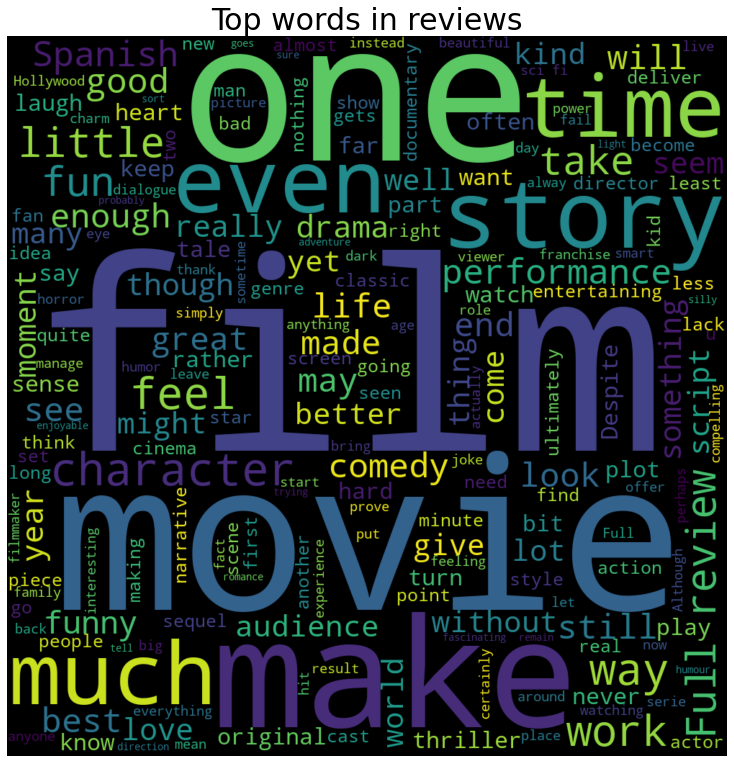

In [33]:
def wordCloud_generator(df, title=None):
    wordcloud = WordCloud(width = 1000, height = 1000,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(df.values))                      
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    manager = plt.get_current_fig_manager()
    manager.full_screen_toggle()
    plt.savefig('Dope.png')
    plt.show()
wordCloud_generator(df['review_content'], title="Top words in reviews")

In [34]:
X = df['review_content'].copy()
y = df['review_score'].copy()

In [37]:
apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [41]:
nlp = spacy.load('en_core_web_sm',disable=['parser','ner'])
stop = stopwords.words('english')
def cleanData(reviews):
    all_=[]
    for review in reviews:
        lower_case = review.lower() #lower case the text
        lower_case = lower_case.replace(" n't"," not") #correct n't as not
        lower_case = lower_case.replace("."," . ")
        lower_case = ' '.join(word.strip(string.punctuation) for word in lower_case.split()) #remove punctuation
        words = lower_case.split() #split into words
        words = [word for word in words if word.isalpha()] #remove numbers
        split = [apposV2[word] if word in apposV2 else word for word in words] #correct using apposV2 as mentioned above
        split = [appos[word] if word in appos else word for word in split] #correct using appos as mentioned above
        split = [word for word in split if word not in stop] #remove stop words
        reformed = " ".join(split) #join words back to the text
        doc = nlp(reformed)
        reformed = " ".join([token.lemma_ for token in doc]) #lemmatiztion
        all_.append(reformed)
    df_cleaned = pd.DataFrame()
    df_cleaned['clean_reviews'] = all_
    return df_cleaned['clean_reviews']
X_cleaned = cleanData(X)
X_cleaned.head()

0    crammed dragon fight thing explode columbus sq...
1    fantasy adventure base rick hit percy jackson ...
2    chris columbus return comfort zone mirthless e...
3    good thing say chris adaptation incapable dest...
4    although standard allegorical basis movie duti...
Name: clean_reviews, dtype: object

In [94]:
X_cleaned.to_csv("cleaned_reviews.csv")

In [59]:

           
y = df['review_score'].copy()


In [95]:
y.to_csv("all_scores.csv")

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, stratify=y, random_state=42,test_size=0.3)

In [61]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
max_length = max([len(x) for x in X_train])
vocab_size = len(tokenizer.word_index)+1 #add 1 to account for unknown word
print("Vocabulary size: {}".format(vocab_size))
print("Max length of sentence: {}".format(max_length))
X_train = pad_sequences(X_train, max_length ,padding='post')

Vocabulary size: 57094
Max length of sentence: 45


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.layers import Bidirectional,Embedding,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [64]:
embedding_vector_length=32
num_classes = 5
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_length,input_length=X_train.shape[1]))
model.add(Bidirectional(LSTM(250,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint('../model/model.h5', save_best_only=True, 
                             save_weights_only=False)]
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 45, 32)            1827008   
                                                                 
 bidirectional_1 (Bidirectio  (None, 45, 500)          566000    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 45, 500)           0         
                                                                 
 flatten_1 (Flatten)         (None, 22500)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               2880128   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                      

In [50]:
history = model.fit(X_train, y_train, validation_split=0.11, 
                    epochs=15, batch_size=32, verbose=1,
                    callbacks=callbacks) 

Epoch 1/15
5618/5618 [==============================] - 1071s 190ms/step - loss: 1.2447 - accuracy: 0.4577 - val_loss: 1.1556 - val_accuracy: 0.4892
Epoch 2/15
5618/5618 [==============================] - 993s 177ms/step - loss: 1.0926 - accuracy: 0.5314 - val_loss: 1.1350 - val_accuracy: 0.5077
Epoch 3/15
5618/5618 [==============================] - 1060s 189ms/step - loss: 0.9900 - accuracy: 0.5826 - val_loss: 1.1527 - val_accuracy: 0.5087
Epoch 4/15
5618/5618 [==============================] - 1066s 190ms/step - loss: 0.8766 - accuracy: 0.6379 - val_loss: 1.1934 - val_accuracy: 0.5117
Epoch 5/15
5618/5618 [==============================] - 1094s 195ms/step - loss: 0.7564 - accuracy: 0.6940 - val_loss: 1.2896 - val_accuracy: 0.5087
Epoch 6/15
5618/5618 [==============================] - 1084s 193ms/step - loss: 0.6482 - accuracy: 0.7410 - val_loss: 1.4895 - val_accuracy: 0.5025
Epoch 7/15
5618/5618 [==============================] - 1156s 206ms/step - loss: 0.5576 - accuracy: 0.7793 

Text(0.5, 1.0, 'Training and Validation accuracy')

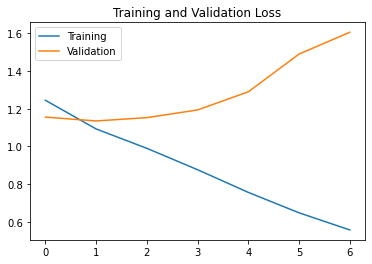

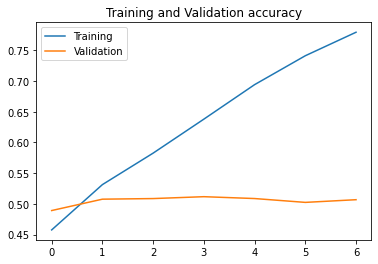

In [65]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title('Training and Validation accuracy')

In [88]:
X_test_token = tokenizer.texts_to_sequences(X_test)
X_test_token = pad_sequences(X_test_token, max_length ,padding='post')
pred = model.predict(X_test_token)
#pred = to_categorical(pred,5)

In [81]:
print(y_test)

152161    1
296618    3
215457    2
29881     2
193799    3
         ..
265942    4
223810    4
309269    4
162547    5
189587    4
Name: review_score, Length: 86556, dtype: int32


In [89]:
print(pred)

[[0.20123427 0.20095773 0.20041758 0.19793639 0.19945402]
 [0.20116265 0.20092885 0.20038885 0.19799343 0.19952624]
 [0.20130007 0.20102374 0.20041624 0.19778313 0.19947681]
 ...
 [0.20135029 0.20102407 0.20052354 0.19767593 0.19942623]
 [0.20103298 0.20093732 0.20023826 0.19826265 0.19952874]
 [0.2011678  0.20080537 0.20065403 0.19793147 0.19944134]]


In [82]:
import numpy as np

In [91]:
t = np.argmax(pred,axis=1)
t.

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [93]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, t))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.10      0.03      0.04      7500
           2       0.20      0.02      0.04     21256
           3       0.00      0.00      0.00     25796
           4       0.00      0.00      0.00     25773
           5       0.00      0.00      0.00      6231

    accuracy                           0.01     86556
   macro avg       0.05      0.01      0.01     86556
weighted avg       0.06      0.01      0.01     86556



C:\Users\nishi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nishi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nishi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 